In [813]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

* __We'll start off with:__ <br>
loading the dataset & removing all the Unnamed columns.
> _Note: we can verify by `data.describe()` using the `include='all'` flag. <br>
to include all columns._

In [814]:
data = pd.read_csv("datasets/stock.csv").iloc[:,:6]
data.drop_duplicates(inplace=True)
data.describe(include='all')

,Date,AMZN,DPZ,BTC,NFLX,Price Movement
count,186,184.000000,185.000000,187.000000,187.000000,187
unique,186,NaN,NaN,NaN,NaN,3
top,05/01/2013,NaN,NaN,NaN,NaN,flat
freq,1,NaN,NaN,NaN,NaN,63
mean,NaN,321.272936,60.821144,328.078717,41.634767,NaN
std,NaN,47.429014,4.451592,337.855886,7.762414,NaN
min,NaN,248.229996,51.190983,69.660004,29.464285,NaN
25%,NaN,283.322510,57.350689,109.549999,34.621428,NaN
50%,NaN,305.400009,61.196548,134.779999,42.978573,NaN
75%,NaN,365.250000,64.807991,487.914993,48.031430,NaN


* Now it's time to use the `data.datatypes` to check if we have valid datatypes

In [815]:
data.dtypes

Date                object
AMZN               float64
DPZ                float64
BTC                float64
NFLX               float64
Price Movement      object
dtype: object

In [815]:
data.dtypes

Date                object
AMZN               float64
DPZ                float64
BTC                float64
NFLX               float64
Price Movement      object
dtype: object

our output shows tells us that we have 2 object _(i.e: strings)_<br>
* __the Date__ <br>
_which will be converted into datetime object & splitted into day, month, year_
* __Price Movement__ <br>
_will be encoded using LabelEncoder_

In [816]:
# spliting date to day, month, year.
data['Date'] = pd.to_datetime(data['Date']).ffill()

data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.drop(['Date'], axis=1, inplace=True)

In [817]:
# change date attribs to int64
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data.dtypes

AMZN               float64
DPZ                float64
BTC                float64
NFLX               float64
Price Movement      object
day                  int64
month                int64
year                 int64
dtype: object

In [818]:
# Fill NaN values with column means
data['AMZN'] = data['AMZN'].fillna(data['AMZN'].mean())
data['DPZ'] = data['DPZ'].fillna(data['DPZ'].mean())
data['BTC'] = data['BTC'].fillna(data['BTC'].mean())
data['NFLX'] = data['NFLX'].fillna(data['NFLX'].mean())
data.describe(include='all')

,AMZN,DPZ,BTC,NFLX,Price Movement,day,month,year
count,187.000000,187.000000,187.000000,187.000000,187,187.00000,187.000000,187.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,flat,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN
mean,321.272936,60.821144,328.078717,41.634767,NaN,15.59893,7.802139,2013.090909
std,47.044967,4.427594,337.855886,7.762414,NaN,8.68224,3.070567,0.288252
min,248.229996,51.190983,69.660004,29.464285,NaN,1.00000,1.000000,2013.000000
25%,283.855011,57.350689,109.549999,34.621428,NaN,8.00000,6.000000,2013.000000
50%,306.100006,61.139969,134.779999,42.978573,NaN,16.00000,8.000000,2013.000000
75%,364.485000,64.798558,487.914993,48.031430,NaN,23.00000,10.000000,2013.000000


In [819]:
# label encoding
encoder = LabelEncoder()
data["Price Movement "] = encoder.fit_transform(data['Price Movement '])
data

,AMZN,DPZ,BTC,NFLX,Price Movement,day,month,year
0,248.229996,51.190983,106.250000,30.415714,0,1,5,2013
1,252.550003,51.987320,98.099998,30.641428,0,2,5,2013
2,258.049988,52.446388,112.900002,30.492857,0,3,5,2013
3,255.720001,53.205257,109.599998,30.098572,0,6,5,2013
4,257.730011,54.151505,113.199997,29.464285,0,7,5,2013
...,...,...,...,...,...,...,...,...
182,407.049988,68.096123,962.210022,46.958572,2,21,1,2014
183,404.540009,69.401108,950.950012,47.675713,2,22,1,2014
184,399.869995,68.890442,944.159973,55.531429,2,23,1,2014
185,387.600006,67.311211,916.549988,55.154285,2,24,1,2014


<Axes: >

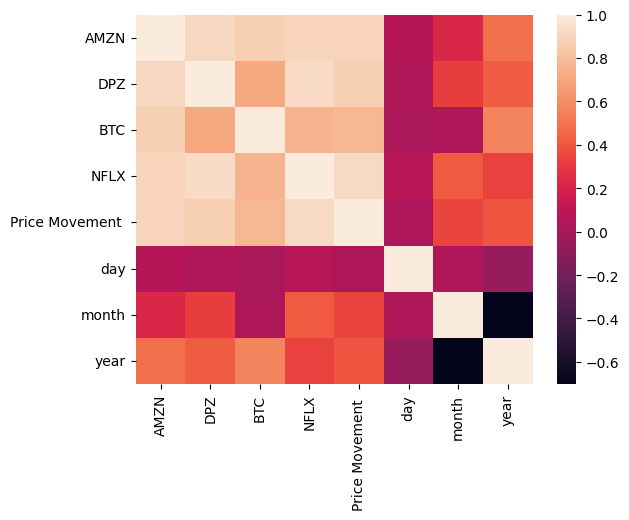

In [820]:
# knowing feature importance.
corr = data.select_dtypes('number').corr()

sns.heatmap(corr)

In [821]:
# drop the non important features
data = data.drop(['day'],axis=1)
# data = data.drop(['month'],axis=1)      not included as it has a negative effect on the year values 

<Axes: >

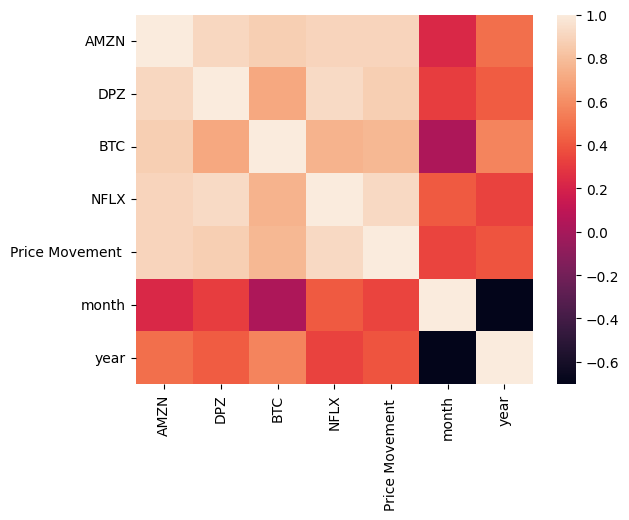

In [822]:
# heatmap after feature selection
corr = data.select_dtypes('number').corr()

sns.heatmap(corr)

In [823]:
# data classification and split for train & test.
X, Y = data.drop(['Price Movement '],axis=1), data['Price Movement ']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)  

In [824]:
DT_model = DecisionTreeClassifier(min_samples_leaf=3)
DT_model.fit(x_train, y_train)

svm_model = SVC(kernel='linear',C=5, random_state=0)
svm_model.fit(x_train_scaled, y_train)


log_reg = LogisticRegression().fit(x_train_scaled, y_train)

# Initialize and train the Random Forest model with reduced number of estimators and limited depth
random_forest_model = RandomForestClassifier(n_estimators=10,random_state=0,ccp_alpha=0.2)  # Reduce number of estimators and depth
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.2, n_estimators=10, random_state=0)

In [825]:
predictions_dt_test = DT_model.predict(x_test)
accuracy_test_dt = accuracy_score(y_test, predictions_dt_test)
predictions_dt_train = DT_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, predictions_dt_train)

predictions_svm_train = svm_model.predict(x_train_scaled)
accuracy_train_svm = accuracy_score(y_train, predictions_svm_train)
predictions_svm_test = svm_model.predict(x_test_scaled)
accuracy_test_svm = accuracy_score(y_test, predictions_svm_test)

# Model Prediction & Accuracy (Random Forest)
predictions_rf_train = random_forest_model.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, predictions_rf_train)
predictions_rf_test = random_forest_model.predict(x_test)
accuracy_test_rf = accuracy_score(y_test, predictions_rf_test)

# Evaluate Logistic Regression model
predictions_log_test = log_reg.predict(x_test_scaled)
accuracy_test_log = accuracy_score(y_test, predictions_log_test)
prediction_log = log_reg.predict(x_train_scaled)
accuracy_train_log = accuracy_score(y_train, prediction_log)

print("\nLogistic Regression model Training Accuracy: {:.2f}%".format(accuracy_train_log * 100))
print("Logistic Regression model Test Accuracy: {:.2f}%".format(accuracy_test_log * 100))

print("SVC train accuracy: {:.2f}%".format(accuracy_train_svm * 100))
print("SVC test accuracy: {:.2f}%".format(accuracy_test_svm * 100))

print("DT train accuracy: {:.2f}%".format(accuracy_train_dt * 100))
print("DT test accuracy: {:.2f}%".format(accuracy_test_dt * 100))

print("\nRandom Forest model Training Accuracy: {:.2f}%".format(accuracy_train_rf * 100))
print("Random Forest model Testing Accuracy: {:.2f}%".format(accuracy_test_rf * 100))


Logistic Regression model Training Accuracy: 100.00%
Logistic Regression model Test Accuracy: 92.11%
SVC train accuracy: 100.00%
SVC test accuracy: 92.11%
DT train accuracy: 99.33%
DT test accuracy: 92.11%

Random Forest model Training Accuracy: 100.00%
Random Forest model Testing Accuracy: 89.47%


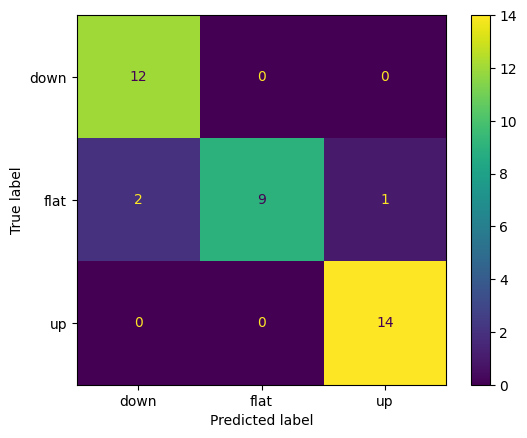

In [826]:
# showing confusion matrix
cm = confusion_matrix(y_test, predictions_dt_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["down","flat","up"])

disp = disp.plot()

In [827]:
x_test

,AMZN,DPZ,BTC,NFLX,month,year
158,384.239990,65.429375,936.770020,52.709999,12,2013
183,404.540009,69.401108,950.950012,47.675713,1,2014
35,273.440002,54.079426,109.500000,31.931429,6,2013
4,257.730011,54.151505,113.199997,29.464285,5,2013
2,258.049988,52.446388,112.900002,30.492857,5,2013
165,399.200012,66.062965,702.750000,54.055714,12,2013
179,395.869995,67.339592,941.219971,47.197144,1,2014
1,252.550003,51.987320,98.099998,30.641428,5,2013
30,275.790009,56.420074,100.000000,30.770000,6,2013
119,328.929993,63.223888,183.149994,47.642857,10,2013


In [828]:
# predicting custom values
pred = DT_model.predict([[199.059998	,70.478928	,130.149994	,93.165714	,1	,2021]])
encoder.inverse_transform(pred)

/home/elreyodev/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['down'], dtype=object)

In [829]:
# making decision trees with different alphas:
path=DT_model.cost_complexity_pruning_path(x_train,y_train) 
alphas=path['ccp_alphas']
dts = []
for alpha in alphas:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    dt.fit(x_train,y_train)
    dts.append(dt)

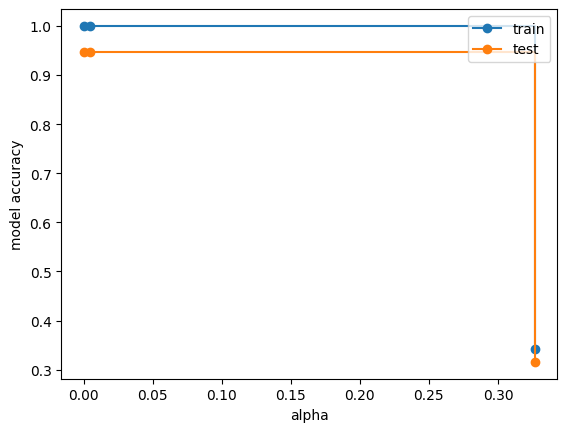

In [830]:
# plotting the effect of alphas on accuracies
train_scores = [dt.score(x_train, y_train) for dt in dts]
test_scores = [dt.score(x_test, y_test) for dt in dts]

flg, ax = plt.subplots()
ax.set_xlabel('alpha')              # the label at x_(ax)is
ax.set_ylabel('model accuracy')     # the label at y_(ax)is
ax.plot(alphas, train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(alphas, test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()   # shows the color mapping of the 2 graphs at top right corner.
plt.show()

`graph shows:` different `ccp_alpha` values for Decision Tree model.<br>
> ___Note that__: just by looking to the graph we can see that the optimal value is btw: __0.00 - 0.31___

<Axes: xlabel='tree'>

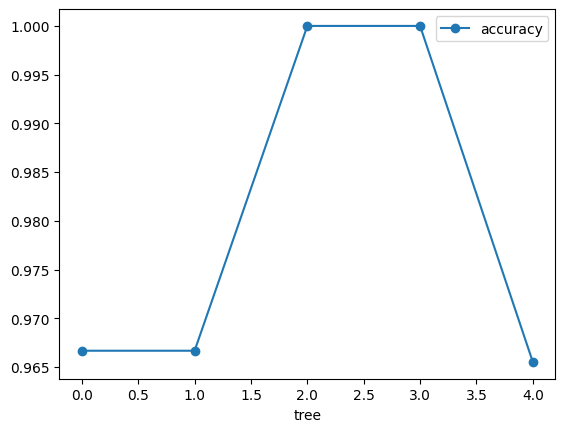

In [831]:
# DT model after using optimal alpha values
DT_model = DecisionTreeClassifier(random_state=42,ccp_alpha=0.31)
scores = cross_val_score(DT_model, x_train, y_train, cv=5)
scores_df = pd.DataFrame(data={"tree":range(5), "accuracy":scores}) 
scores_df.plot(x="tree", y="accuracy", marker="o")

`the above figure shows:` that for the  same alpha the accuracy changes as the dataset changes. 

In [832]:
# testing possible sample leaf values & their effect
dts = []
for state in range(1,20):
    dt = DecisionTreeClassifier(random_state=state,ccp_alpha=0.2)
    dt.fit(x_train,y_train)
    dts.append(dt)

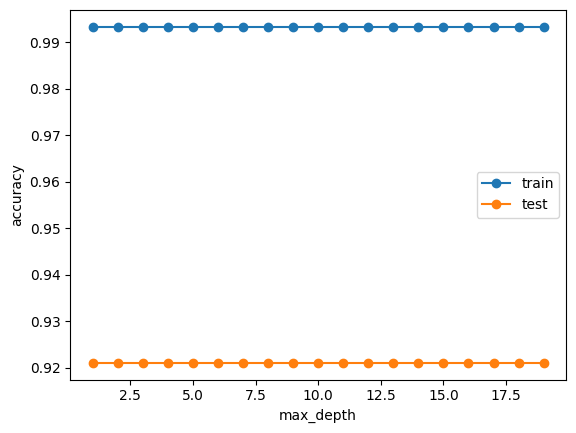

In [833]:
# plotting the effect of sample leafs
train_scores = [dt.score(x_train, y_train) for dt in dts]
test_scores = [dt.score(x_test, y_test) for dt in dts]

flg, ax = plt.subplots()
ax.set_xlabel('max_depth')    # the label at x_(ax)is
ax.set_ylabel('accuracy')     # the label at y_(ax)is
ax.plot(range(1,20), train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(range(1,20), test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()   # shows the color mapping of the 2 graphs at top right corner.
plt.show()

>__now, since we have more insight about our data & hyperparameters__

we can recreate the `DecisionTreeClassifier` model after tweeking the tree's `ccp_alpha` values and `max depth`. <br>

In [834]:
DT_model = DecisionTreeClassifier(criterion='gini', random_state=2,ccp_alpha=0.2)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.2, random_state=2)

In [835]:
predictions_dt_test = DT_model.predict(x_test)
accuracy_test_dt = accuracy_score(y_test, predictions_dt_test)
predictions_dt_train = DT_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, predictions_dt_train)
print("train accuracy: {:.2f}%".format(accuracy_train_dt * 100))
print("test accuracy: {:.2f}%".format(accuracy_test_dt * 100))

train accuracy: 99.33%
test accuracy: 92.11%


finally.. we show our `confusion_matrix` to have a more detailed look on our model's predictions

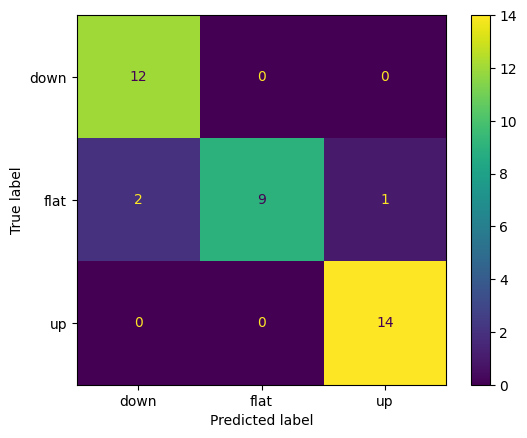

In [836]:
# showing confusion matrix
cm = confusion_matrix(y_test, predictions_dt_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["down","flat","up"])

disp = disp.plot()